[[127 133 147 ...  34  32  32]
 [124 137 150 ...  42  41  41]
 [141 149 154 ...  38  39  39]
 ...
 [239 242 246 ...  17  17  17]
 [239 240 245 ...  15  15  15]
 [236 245 242 ...  20  20  20]]
DATA di 0 - prima riga
[127 133 147 163 176 192 207 214 217 214 217 213 214 216 216 219 219 216
 213 219 213 221 224 229 233 239 238 243 236 233 224 229 226 220 216 219
 220 217 217 216 214 214 214 210 207 210 208 203 205 201 197 198 192 185
 184 170 143  93  77  42  35  34  32  32]
num cols:  64
num rows:  64
1
Sono in split
r:  64 , h: 64
prima del return
2
Numero di sottoimmagini:  64
arrayOf64LittleImages:  64
Lunghezza array delle medie:  64
indice i  0
[[127 133 147 163 176 192 207 214]
 [124 137 150 166 185 201 216 217]
 [141 149 154 175 197 210 217 217]
 [152 153 169 188 210 211 214 216]
 [156 175 191 205 214 213 214 214]
 [173 195 207 213 216 213 213 210]
 [203 214 214 217 208 213 207 208]
 [213 214 213 213 211 208 207 205]]
[ 0.48573662  0.23651538  0.02126483 -0.21678303 -0.83086681 -1.

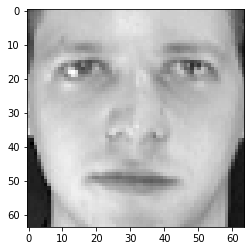

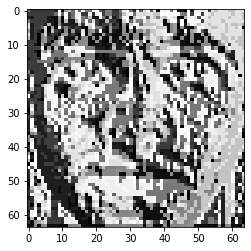

[[120  56  56 ... 224 224 224]
 [ 60  60  60 ... 227 225 193]
 [ 30  28  60 ... 225 227 195]
 ...
 [  0 185   0 ... 223  30   0]
 [ 62  13 146 ... 255  46   3]
 [ 14   6 143 ...  13   6 131]]
LBP Program is finished
(64, 64)
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[1 4 5 6]
NUM
114
where_img01_vector
[0 1 2 3 4 5 6 7]
NUM
255
where_img01_vector
[1 2 5 6]
NUM
102
where_img01_vector
[0 1 2 3 4 5 6 7]
NUM
255
where_img01_vector
[0 2 3 4 5]
NUM
61
where_img01_vector
[4 5 6]
NUM
112
where_img01_vector
[0 4 5 6 7]
NUM
241
where_img01_vector
[1 3 4 5 6 7]
NUM
250
where_img01_vector
[3 4 5]
NUM
56
where_img01_vector
[3 4 5]
NUM
56
where_img01_vector
[3 4 5 6 7]
NUM
248
where_img01_vector
[4 5]
NUM
48
where_img01_vector
[4 5 6 7]
NUM
240
where_img01_vector
[1 2 3 4 5 

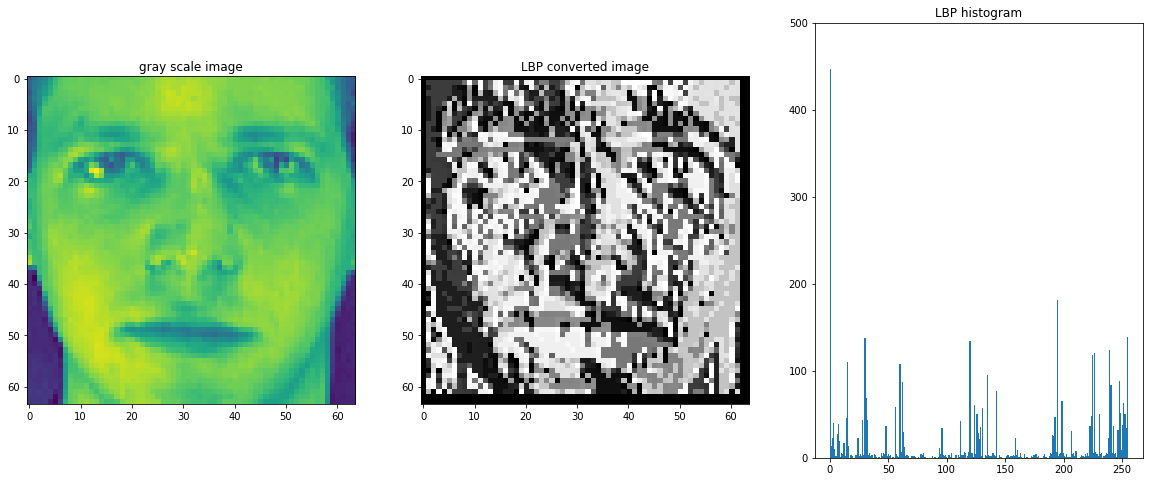

[0.03222656 0.01098633 0.00146484 0.0065918  0.01367188 0.00244141
 0.0078125  0.02148438 0.00097656 0.         0.         0.00073242
 0.00830078 0.00048828 0.01000977 0.02880859 0.01147461 0.00219727
 0.00024414 0.00146484 0.00146484 0.00024414 0.00048828 0.00048828
 0.00854492 0.00073242 0.00048828 0.00073242 0.02441406 0.00170898
 0.02514648 0.0234375  0.00097656 0.         0.         0.
 0.         0.         0.00024414 0.00024414 0.         0.
 0.         0.         0.00048828 0.         0.         0.
 0.00732422 0.00097656 0.00024414 0.00024414 0.00170898 0.00024414
 0.00048828 0.         0.01293945 0.00024414 0.00024414 0.00024414
 0.04833984 0.00048828 0.01342773 0.00756836 0.01904297 0.0012207
 0.         0.00146484 0.00390625 0.00073242 0.00170898 0.0012207
 0.00024414 0.         0.         0.         0.00024414 0.
 0.00048828 0.00048828 0.00097656 0.00024414 0.00024414 0.
 0.00048828 0.         0.         0.         0.00195312 0.00024414
 0.         0.00024414 0.00097656 0. 

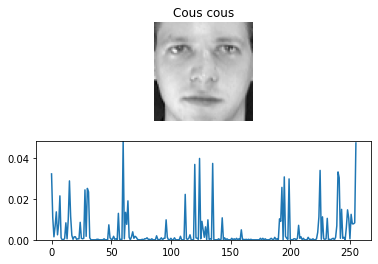

In [1]:
from ipynb.fs.full.task1_new import *
import numpy as np
from operator import itemgetter

from PIL import Image
from numpy import asarray
from scipy.stats import skew

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from scipy.linalg import svd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
import re
from sklearn.utils.extmath import randomized_svd
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
# import OS module
import os

# Get the list of all files and directories
path = "./secondaparte/images/"
dir_list = os.listdir(path) # array di stringhe contenente i nomi dei file
 
dir_list.sort()
dir_list.remove('.DS_Store')

print(len(dir_list))

4787


In [3]:
# funzione usata per creare i file di database

def createDataBase(modelName):
    dictionaryOfDescriptors = {}
    for i in range(0, len(dir_list)):
        colorMomentsOfImage = ottieniDescrittoreSecondaParte(
            dir_list[i], modelName)

        if type(colorMomentsOfImage) != list:
            lista = colorMomentsOfImage.tolist() # nested lists with same data, indices
            dictionaryOfDescriptors[dir_list[i]] = lista
        else:
            dictionaryOfDescriptors[dir_list[i]] = colorMomentsOfImage
    
    fileName = 'DB_' + modelName + '.json'

    # controlliamo se il file esiste o no
    file = open('./databasefilesecondaparte/' + fileName,'w+')

    with open('./databasefilesecondaparte/' + fileName, 'w') as convert_file:
        convert_file.write(json.dumps(dictionaryOfDescriptors, indent=4, sort_keys=True))

In [5]:
createDataBase('HOG')

[0.47366364 0.29490293 0.09774505 ... 0.         0.01453802 0.31530208]
[0.34882024 0.34882024 0.19633662 ... 0.10726763 0.05073934 0.04086583]
[0.59739656 0.30249506 0.07555545 ... 0.00273666 0.00425624 0.02185539]
[0.31823574 0.         0.02145229 ... 0.009479   0.         0.06678486]
[0.33801202 0.33801202 0.18106279 ... 0.02419507 0.03377464 0.01959195]
[0.28599548 0.         0.         ... 0.01525904 0.01846441 0.04052365]
[0.45527217 0.25789351 0.         ... 0.         0.         0.18660454]
[0.46540786 0.06260215 0.06708849 ... 0.00121636 0.00169402 0.02023211]
[0.4492077  0.31810812 0.03189162 ... 0.         0.         0.        ]
[0.31907443 0.11333052 0.02894859 ... 0.         0.         0.00564227]
[0.25762237 0.12539283 0.04200802 ... 0.01577051 0.00201508 0.23348621]
[0.27918015 0.02766414 0.03539459 ... 0.         0.00537301 0.03778279]
[0.18418289 0.0117493  0.         ... 0.01224836 0.05809889 0.00824372]
[0.19168425 0.01703981 0.01088876 ... 0.02361585 0.         0.02

In [ ]:
createDataBase('LBP')

In [ ]:
createDataBase('ColorMoments')